SCRAPING TOKOPEDIA

In [31]:
!pip install google_play_scraper

In [32]:
from google_play_scraper import app, reviews
import pandas as pd
import datetime

In [33]:
from google_play_scraper import reviews, Sort

app_id = 'com.tokopedia.tkpd'

def get_reviews(app_id, lang='id', count=2000, sort=Sort.NEWEST, filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )
        return result, continuation_token
    except Exception as e:
        print("Error:", e)
        return None, None

reviews_data, continuation_token = get_reviews(app_id)

if reviews_data is not None:
    print("Jumlah ulasan:", len(reviews_data))
    if len(reviews_data) > 0:
        print("Ulasan pertama:")
        print(reviews_data[0])
else:
    print("Tidak ada ulasan yang ditemukan.")


Jumlah ulasan: 2000
Ulasan pertama:
{'reviewId': '3cc81b0a-48ca-4d6b-a8a5-44959e82eee4', 'userName': 'Gogor Wahyu', 'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjUyFpB1fGPEULYyyPFnPDTEUfesPg2QamWVrBmFg4BsbaT_TEm6', 'content': 'Dear tokopedia, fitur search sering bermasalah, hasil tidak sesuai kata kunci, barang tidak ada padahal ada, yang tidak berhubungan malah muncul, di sortir juga tidak sesuai urutan, tolong dikembalikan fitur search seperti sedia kala, kita butuh fitur pencarian yang tepat', 'score': 5, 'thumbsUpCount': 3, 'reviewCreatedVersion': '3.334.1', 'at': datetime.datetime(2025, 10, 17, 11, 59, 26), 'replyContent': 'Toppers, terima kasih atas rating yang kamu berikan serta kepercayaan kamu dalam memilih Tokopedia sebagai tempat berbelanja online. Jika kamu punya kritik/saran, atau ada kendala pada aplikasi Tokopedia, silakan info melalui http://tokopedia.com/help', 'repliedAt': datetime.datetime(2024, 8, 2, 4, 19, 7), 'appVersion': '3.334.1'}


In [34]:
import csv

def export_to_csv(reviews, file_name='hasil_scrap_ulasan_app_tokopedia.csv'):
    if reviews:
        fieldnames = ['reviewId', 'userName', 'score', 'content', 'at']

        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for review in reviews:
                writer.writerow({
                    'reviewId': review['reviewId'],
                    'userName': review['userName'],
                    'score': review['score'],
                    'content': review['content'],
                    'at': review['at']
                })

        print(f"Data berhasil diekspor ke '{file_name}'")
    else:
        print("Tidak ada data ulasan untuk diekspor.")

export_to_csv(reviews_data)

Data berhasil diekspor ke 'hasil_scrap_ulasan_app_tokopedia.csv'


In [35]:
import pandas as pd

data = pd.read_csv('hasil_scrap_ulasan_app_tokopedia.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  2000 non-null   object
 1   userName  2000 non-null   object
 2   score     2000 non-null   int64 
 3   content   2000 non-null   object
 4   at        2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [36]:
data.head(20)

,reviewId,userName,score,content,at
0,3cc81b0a-48ca-4d6b-a8a5-44959e82eee4,Gogor Wahyu,5,"Dear tokopedia, fitur search sering bermasalah...",2025-10-17 11:59:26
1,4de30001-fbac-490c-8e76-7af3bf8394be,Orang Kampung,1,barang2 dsini sudah muali mahal. kalo buka eta...,2025-10-17 11:40:22
2,108c19c0-2edf-4072-b080-e2a9cec840eb,Pengguna Google,1,tiba2 dapet notif melanggar syarat dan ketentu...,2025-10-17 11:37:31
3,a8fc8a3f-bf62-48f0-aa14-1e7f6845fa39,Cep Na,5,oke apk nya,2025-10-17 11:30:31
4,4a9c3ce2-3448-4f97-968f-71c43d3d0b6a,Alfian Julianto,5,sukak banget belanja di tokopedia ini,2025-10-17 11:16:26
5,6bdeafd6-7781-4fe1-87f2-1e466af7c5ff,Feber Wang,5,Good Aplication .. !,2025-10-17 11:11:26
6,461c8430-a1e0-4506-a7b5-2c7ac90f1701,Deny Setiawan,5,respon cepat,2025-10-17 11:04:42
7,aaadcea7-9127-483c-89ee-7f2e6c294787,Arifin audio,1,semenjak Tokopedia bergabung dengan tiktok sem...,2025-10-17 10:55:32
8,ebe29ad9-e821-4566-b10c-ff41703d0d84,Franky Purwanto,2,good,2025-10-17 10:27:26
9,cd0aa37d-5d97-456b-8e60-fa199f080d09,Benny Indra Nasution,5,lancar transaksinya,2025-10-17 10:13:54


CASE FOLDING

In [37]:
import pandas as pd

df = pd.read_csv("hasil_scrap_ulasan_app_tokopedia.csv")

print("Data dengan huruf kapital:")
sample_data = df[df['content'].apply(lambda x: any(c.isupper() for c in str(x)))].head()
print(sample_data[['content']])

df['content_casefolded'] = df['content'].apply(lambda x: str(x).casefold())

print("\nSetelah case folding:")
if len(sample_data) > 0:
    sample_indices = sample_data.index
    comparison = df.loc[sample_indices, ['content', 'content_casefolded']]
    print(comparison)
else:
    print("Tidak ditemukan data dengan huruf kapital")
    print(df[['content', 'content_casefolded']].head())

print(f"\nTotal data: {len(df)}")
print(f"Data dengan huruf kapital (sebelum case folding): {df['content'].apply(lambda x: any(c.isupper() for c in str(x))).sum()}")

df.to_csv("hasil_casefolding_tokopedia.csv", index=False)
print("\n Hasil case folding telah disimpan ke 'hasil_casefolding_tokopedia.csv'")


Data dengan huruf kapital:
                                              content
0   Dear tokopedia, fitur search sering bermasalah...
5                                Good Aplication .. !
7   semenjak Tokopedia bergabung dengan tiktok sem...
11  kecewa di 13 th, ketmu penjual toko penipu ber...
13  Punya limit diatas 10 jt. tiba2 dipotong jd 3 ...

Setelah case folding:
                                              content  \
0   Dear tokopedia, fitur search sering bermasalah...   
5                                Good Aplication .. !   
7   semenjak Tokopedia bergabung dengan tiktok sem...   
11  kecewa di 13 th, ketmu penjual toko penipu ber...   
13  Punya limit diatas 10 jt. tiba2 dipotong jd 3 ...   

                                   content_casefolded  
0   dear tokopedia, fitur search sering bermasalah...  
5                                good aplication .. !  
7   semenjak tokopedia bergabung dengan tiktok sem...  
11  kecewa di 13 th, ketmu penjual toko penipu ber...  
13 

PREPOCESSING

In [38]:
!pip install Sastrawi

In [43]:
!pip install wordfreq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.8 MB/s eta 0:00:00


In [47]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordfreq import tokenize as wordfreq_tokenize

nltk.download('punkt_tab')
nltk.download('stopwords')

df = pd.read_csv("hasil_casefolding_tokopedia.csv")
df.rename(columns={'content_casefolded': 'Case Folding', 'content': 'Hasil Scrap'}, inplace=True)

stop_words = set(stopwords.words('indonesian'))

base_words = set([
    "barang", "lewat", "bagus", "cepat", "pengiriman", "murah", "datang", "produk",
    "baik", "jual", "kualitas", "puas", "terima", "kasih", "penjual", "top", "banget",
    "mantap", "harga", "barangnyabaguss", "rekomendasi", "oke", "pengiriman", "respon", "sendiri", "enak", "ongkir","masa"
])

def split_merged_words(text):
    new_text = []
    for word in text.split():
        if word not in base_words:
            for i in range(3, len(word)-2):
                left, right = word[:i], word[i:]
                if left in base_words and right in base_words:
                    new_text.append(left)
                    new_text.append(right)
                    break
            else:
                new_text.append(word)
        else:
            new_text.append(word)
    return ' '.join(new_text)

#filtering
def filtering(text):
    text = ' '.join(wordfreq_tokenize(text, 'id'))
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = split_merged_words(text)
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]

    return ' '.join(filtered)

df['Filtering'] = df['Case Folding'].apply(filtering)

#stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return stemmer.stem(text)

df['Stemming'] = df['Filtering'].apply(stemming)

#tokenizing
df['Token Raw'] = df['Stemming'].apply(word_tokenize)

def filtering_tokens(tokens):
    return [word for word in tokens if word.isalpha() and word not in stop_words]

df['Token Filtered'] = df['Token Raw'].apply(filtering_tokens)

df_final = df[[
    'Hasil Scrap',
    'Case Folding',
    'Filtering',
    'Stemming',
    'Token Raw',
    'Token Filtered'
]]

df_final.to_excel('hasil_preprocessing_tokopedia.xlsx', index=False)
print("\n Hasil preprocessing telah disimpan ke 'hasil_preprocessing_tokopedia.xlsx'")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



 Hasil preprocessing telah disimpan ke 'hasil_preprocessing_tokopedia.xlsx'


NORMALISASI KATA, REMOVE DUPLICATE, UNIGRAM, BIGRAM, TRIGRAM, DAN WORDCLOUD

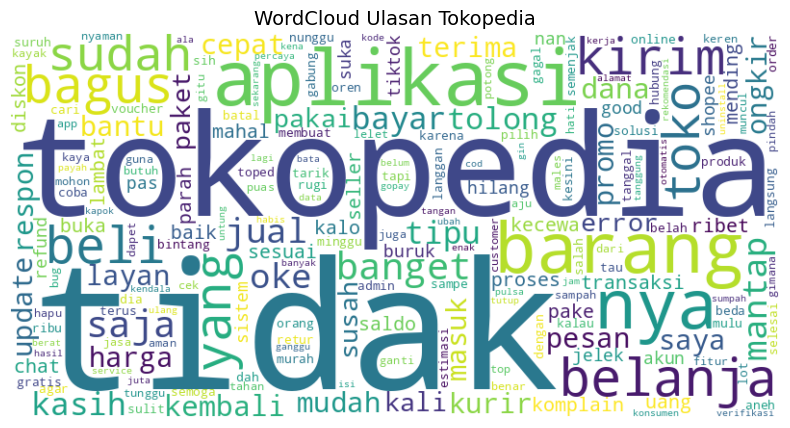


 Hasil final telah disimpan ke 'hasil_tokopedia_final.xlsx'


In [49]:
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import OrderedDict
from nltk.util import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import ast

df = pd.read_excel('hasil_preprocessing_tokopedia.xlsx')

normalisasi_dict = {
    "gk": "tidak", "ga": "tidak", "gak": "tidak", "nggak": "tidak", "ngga": "tidak",
    "bgt": "banget", "bngt": "banget", "bener": "benar",
    "udh": "sudah", "dgn": "dengan", "yg": "yang", "kga": "tidak",
    "aja": "saja", "tp": "tapi", "klo": "kalau", "blm": "belum",
    "trs": "terus", "krn": "karena", "sm": "sama", "kyk": "seperti", "apk": "aplikasi", "bnyak": "banyak",
    "dr": "dari", "jd": "jadi", "mo": "mau", "br": "baru", "tokped": "tokopedia",
    "tdk": "tidak", "sdh": "sudah", "udah": "sudah", "dg": "dengan",
    "ny": "nya", "nyari": "mencari", "nyampe": "sampai", "smoga": "semoga",
    "sy": "saya", "brg": "barang", "brng": "barang", "bwt": "buat",
    "karna": "karena", "kl": "kalau", "klu": "kalau", "lg": "lagi", "lgi": "lagi",
    "trus": "terus", "blom": "belum", "bisaaa": "bisa", "bisaa": "bisa",
    "ajaah": "saja", "aj": "saja", "dtg": "datang", "msh": "masih",
    "mksh": "makasih", "maksh": "makasih", "trimakasih": "terima kasih", "tq": "terima kasih", "thx": "terima kasih",
    "bgs": "bagus", "bgsx": "bagus", "beliin": "membelikan", "beliinlah": "membelikan",
    "ksh": "kasih", "abis": "habis", "benerin": "benarkan", "bagusan": "lebih bagus",
    "makin": "semakin", "ngirim": "mengirim", "nyesel": "menyesal", "smpe": "sampai",
    "plis": "tolong", "tolonglah": "tolong", "bikin": "membuat", "moga": "semoga", "moga2": "semoga",
    "kr": "karena", "jg": "juga", "ajaa": "saja", "ajaaa": "saja", "bgus": "bagus",
    "parahh": "parah", "bangettt": "banget", "mantapp": "mantap", "mantappu": "mantap",
    "ok": "oke", "okee": "oke", "okey": "oke", "okeeey": "oke",
    "kmrn": "kemarin", "skrg": "sekarang", "besok2": "besok", "nnti": "nanti",
    "biar": "agar", "bgttt": "banget", "inj": "ini", "dti": "di", "woiii": "woi", "tgl": "tanggal", "eror":"error", "kndala":"kendala", "sprti":"seperti","lemoott":"lemot",     "gue": "saya",
    "gua": "saya","jt":"juta","rb":"ribu","sopee":"shopee","uninstal":"uninstall","dsini":"disini",
    "gw": "saya","ketmu":"ketemu","knapa":"kenapa","ndak":"tidak","kndalasprti":"kendala seperti", "baranglewat":"barang lewat",
    "aq": "saya",
    "aqh": "saya","kliatan":"lihat",
    "aku": "saya"
}

# normalisasi kata
def normalisasi_kata(text):
    words = str(text).split()
    normalized = [normalisasi_dict.get(word, word) for word in words]
    return ' '.join(normalized)

df['Normalisasi'] = df['Stemming'].apply(normalisasi_kata)

# remove duplicate
def remove_duplicates(text):
    words = str(text).split()
    unique_words = list(OrderedDict.fromkeys(words))
    return ' '.join(unique_words)

df['No_Duplikat'] = df['Normalisasi'].apply(remove_duplicates)

# hapus huruf berulang dan kata kurang dari 3 huruf
def bersihkan_teks(text):
    words = str(text).split()
    cleaned_words = []
    for w in words:
        w = re.sub(r'(.)\1{2,}', r'\1', w)
        if len(w) >= 3:
            cleaned_words.append(w)
    return ' '.join(cleaned_words)

df['Bersih'] = df['No_Duplikat'].apply(bersihkan_teks)
df['Bersih_token'] = df['Bersih'].apply(word_tokenize)

def safe_eval_list(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except Exception:
        return []

df['Token Filtered'] = df['Token Filtered'].apply(safe_eval_list)

# unigram, bigram, trigram
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

df['Unigram'] = df['Bersih_token'].apply(lambda x: generate_ngrams(x, 1))
df['Bigram'] = df['Bersih_token'].apply(lambda x: generate_ngrams(x, 2))
df['Trigram'] = df['Bersih_token'].apply(lambda x: generate_ngrams(x, 3))

#hapus kata tidak bermakna
stopwords = set(['yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'dengan', 'pada', 'itu', 'ini'])
def filter_bigram(bigrams):
    return [bg for bg in bigrams if bg[0] not in stopwords and bg[1] not in stopwords]

df['Bigram_Filtered'] = df['Bigram'].apply(filter_bigram)

#wordcloud
all_words = ' '.join(df['Bersih'])
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Ulasan Tokopedia", fontsize=14)
plt.show()

df.to_excel('hasil_tokopedia_final.xlsx', index=False)
print("\n Hasil final telah disimpan ke 'hasil_tokopedia_final.xlsx'")
